# Tugas 3 Graph

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv
hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'}

In [ ]:
def scrape_detik(hal):
    global hades
    a = 1
    for page in range(1,hal):
        url = f'https://www.detik.com/search/searchnews?query=pemilu+2024&sortby=time&page={page}'
        ge = req.get(url,hades).text
        sop = bs(ge,'lxml')
        li = sop.find('div',class_='list media_rows list-berita')
        lin = li.find_all('article')
        for x in lin:
            link = x.find('a')['href']
            date = x.find('a').find('span',class_='date').text.replace('WIB','').replace('detikNews','').split(',')[1]
            headline = x.find('a').find('h2').text
            ge_ = req.get(link,hades).text
            sop_ = bs(ge_,'lxml')
            content = sop_.find_all('div',class_='detail__body-text itp_bodycontent')
            for x in content:
                x = x.find_all('p')
                y  = [y.text for y in x ]
                content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
                print(f'done[{a}] > {headline[0:10]}')
                a += 1
                with open('databeritaonline.csv','a')as file:
                    wr = csv.writer(file, delimiter=',')
                    wr.writerow([headline,date,link,content_])

In [ ]:
scrape_detik(5)

done[1] > Kapolda Ja
done[2] > Ini Tokoh 
done[3] > Relawan 'P
done[4] > Andre Rosi
done[5] > Kata Gibra
done[6] > PDIP Apres
done[7] > Saut Ikut 
done[8] > Ketua KPU 
done[9] > Gerindra B
done[10] > IKA Univer
done[11] > Erick Thoh
done[12] > Stafsus Un
done[13] > Jokowi Ber
done[14] > Gantikan L
done[15] > Kabar Cawa
done[16] > Saat Jokow
done[17] > Seberapa P
done[18] > Deklarasi 
done[19] > Seleksi Ko
done[20] > Gibran Sec
done[21] > Makan Sian
done[22] > PSI Nilai 
done[23] > Gus Sadad:
done[24] > Viral Pimp
done[25] > Gibran Bil
done[26] > Anies Perc
done[27] > Jelang Pem
done[28] > Kiai-Santr
done[29] > Djarot: Sa
done[30] > Respons Ha
done[31] > Ganjar: Pa
done[32] > Sekda Enre
done[33] > Pernyataan
done[34] > Prabowo Un
done[35] > Cerita Pra


In [ ]:
import pandas as pd
df = pd.read_csv('/content/databeritaonline.csv')
df

,Kapolda Jatim Imam Sugianto Siap Amankan Piala Dunia U-17 dan Pilpres 2024,30 Okt 2023 19:33,https://www.detik.com/jatim/berita/d-7010507/kapolda-jatim-imam-sugianto-siap-amankan-piala-dunia-u-17-dan-pilpres-2024,"Irjen Imam Sugianto resmi menjabat sebagai Kapolda Jatim. Kehadirannya di Jatim menggantikan Irjen Pol (Purn) Tony Harmanto yang telah memasuki masa paripurna.Usai mengikuti serah terima jabatan (sertijab) hari ini, Imam mengaku akan melanjutkan tugas Kapolda Jatim sebelumnya. Di antaranya persiapan pengamanan Piala Dunia U-17 dan Pilpres 2024.""Agenda yang menunggu 2, Piala Dunia U-17 dan Operasi Mantap Brata untuk Pam Pilpres yang berlangsung sekitar 220 hari sampai Oktober 2024,"" kata Imam saat ditemui awak media di depan Gedung Mahameru Polda Jatim, Senin (30/10/2023).\r\r\rSCROLL TO CONTINUE WITH CONTENT\rImam memastikan persiapan pengamanan Piala Dunia U-17 telah disusun rapi hasil koordinasi Polda Jatim dengan Mabes Polri dan PSSI. Terutama karena Kota Pahlawan akan menjadi lokasi pembukaan Piala Dunia U-17.""Untuk agenda 10 hari ke depan itu event Piala Dunia U-17 yang Insyaallah dipusatkan di Surabaya, ya, pembukaannya,"" katanya.Dia berharap masyarakat Jatim, khususnya warga Surabaya, turut menjaga keamanan agar situasi tetap kondusif. Supaya para pemain dan WNA yang akan menonton pertandingan kelak menjadi nyaman, aman, dan betah berlama-lama di Kota Pahlawan.""Saya mohon dan berharap dukungannya masyarakat, yuk kita sukseskan kegiatan event internasional ini supaya Surabaya aman, nyaman, didatangi siapapun mereka senang di sini,"" tuturnya."
0,Ini Tokoh Terkenal Jatim yang Didambakan Demok...,30 Okt 2023 19:22,https://www.detik.com/jatim/berita/d-7010505/i...,Salah satu tokoh terkenal di Jawa Timur dikaba...
1,"Relawan 'Pagi' Resmikan Posko, Pede Prabowo-Gi...",30 Okt 2023 19:16,https://news.detik.com/pemilu/d-7010487/relawa...,Relawan Laskar Prabowo-Gibran (Pagi) meresmika...
2,Andre Rosiade Apresiasi Makan Siang Jokowi dan...,30 Okt 2023 19:13,https://news.detik.com/pemilu/d-7010484/andre-...,Presiden Joko Widodo (Jokowi) makan siang bers...
3,Kata Gibran soal Disebut Hasto Tinggalkan PDIP...,30 Okt 2023 19:00,https://www.detik.com/sumbagsel/berita/d-70099...,Sekretaris Jenderal (Sekjen) PDIP Hasto Kristi...
4,PDIP Apresiasi Pertemuan Jokowi dan 3 Capres: ...,30 Okt 2023 18:46,https://news.detik.com/pemilu/d-7010416/pdip-a...,PDI Perjuangan mengapresiasi pertemuan Preside...
5,Saut Ikut Cak Imin ke Malang: Saya Hadir untuk...,30 Okt 2023 18:43,https://news.detik.com/pemilu/d-7010409/saut-i...,Mantan Wakil Ketua KPK Saut Situmorang hadir d...
6,Ketua KPU Lantik Anggota KPU Kabupaten/Kota di...,30 Okt 2023 18:27,https://news.detik.com/pemilu/d-7010361/ketua-...,Ketua KPU Hasyim Asy'ari resmi melantik anggot...
7,Gerindra Bogor Targetkan 70% Suara untuk Prabo...,30 Okt 2023 18:23,https://news.detik.com/pemilu/d-7010353/gerind...,Partai Gerindra Kabupaten Bogor menargetkan 70...
8,IKA Universitas Negeri Makassar Bakal Undang 3...,30 Okt 2023 17:40,https://www.detik.com/sulsel/berita/d-7010042/...,Ikatan Kekeluargaan Alumni (IKA) Universitas N...
9,Erick Thohir Sebut dari 11 Proyek Janji Presid...,30 Okt 2023 17:37,https://finance.detik.com/infrastruktur/d-7010...,Erick Thohir memimpin Rapat Koordinasi sebagai...


In [ ]:
import csv
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Fungsi untuk ekstraksi kalimat dari teks
def extract_sentences(text):
    sentences = sent_tokenize(text)
    return sentences

# Baca file CSV dengan data berita
with open('databeritaonline.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    next(reader)  # Skip header row
    for row in reader:
        headline, date, link, content = row

        # Ekstraksi kalimat dari konten berita
        sentences = extract_sentences(content)

        # Tulis kalimat-kalimat ke file CSV baru
        with open('kalimat_berita.csv', 'a') as output_file:
            writer = csv.writer(output_file, delimiter=',')
            for sentence in sentences:
                writer.writerow([headline, date, link, sentence])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/kalimat_berita.csv')
df

,Ini Tokoh Terkenal Jatim yang Didambakan Demokrat Dukung Prabowo-Gibran,30 Okt 2023 19:22,https://www.detik.com/jatim/berita/d-7010505/ini-tokoh-terkenal-jatim-yang-didambakan-demokrat-dukung-prabowo-gibran,Salah satu tokoh terkenal di Jawa Timur dikabarkan segera bergabung dalam Tim Kampanye Nasional (TKN) Prabowo Subianto-Gibran Rakabuming Raka.
0,Ini Tokoh Terkenal Jatim yang Didambakan Demok...,30 Okt 2023 19:22,https://www.detik.com/jatim/berita/d-7010505/i...,Kepala BPOKK DPD Demokrat Jatim Mugianto menye...
1,Ini Tokoh Terkenal Jatim yang Didambakan Demok...,30 Okt 2023 19:22,https://www.detik.com/jatim/berita/d-7010505/i...,"""Harapan kami dan Insyaallah jadi kenyataan ya..."
2,Ini Tokoh Terkenal Jatim yang Didambakan Demok...,30 Okt 2023 19:22,https://www.detik.com/jatim/berita/d-7010505/i...,"Apalagi, Khofifah juga menjabat sebagai Gubern..."
3,Ini Tokoh Terkenal Jatim yang Didambakan Demok...,30 Okt 2023 19:22,https://www.detik.com/jatim/berita/d-7010505/i...,"SCROLL TO CONTINUE WITH CONTENT\n""Bu Khofifah ..."
4,Ini Tokoh Terkenal Jatim yang Didambakan Demok...,30 Okt 2023 19:22,https://www.detik.com/jatim/berita/d-7010505/i...,Beliau sangat pantas jika masuk tim pemenangan...
...,...,...,...,...
781,Cerita Prabowo soal Suasana saat Makan Bareng ...,30 Okt 2023 14:47,https://news.detik.com/pemilu/d-7009796/cerita...,Menteri Pertahanan itu mengatakan menu makan s...
782,Cerita Prabowo soal Suasana saat Makan Bareng ...,30 Okt 2023 14:47,https://news.detik.com/pemilu/d-7009796/cerita...,"""Baru saja diundang makan oleh Bapak Presiden ..."
783,Cerita Prabowo soal Suasana saat Makan Bareng ...,30 Okt 2023 14:47,https://news.detik.com/pemilu/d-7009796/cerita...,"""Saya makan banyak sih,"" timpal Ganjar."
784,Cerita Prabowo soal Suasana saat Makan Bareng ...,30 Okt 2023 14:47,https://news.detik.com/pemilu/d-7009796/cerita...,"""Ada soto tadi, lontong, cumi-cumi, sayur."


In [ ]:
import csv
from sklearn.feature_extraction.text import TfidfVectorizer

# Baca file CSV dengan kalimat-kalimat berita
sentences = []
with open('kalimat_berita.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        sentence = row[-1]  # Ambil kalimat dari kolom terakhir
        sentences.append(sentence)

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF dari kalimat-kalimat
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Dapatkan daftar fitur (kata-kata) dari TF-IDF
features = tfidf_vectorizer.get_feature_names_out()

# Simpan hasil TF-IDF ke dalam file CSV
with open('tfidf_berita.csv', 'w') as output_file:
    writer = csv.writer(output_file, delimiter=',')
    writer.writerow(['Sentence'] + features)  # Header dengan nama fitur
    for i, sentence in enumerate(sentences):
        tfidf_values = tfidf_matrix[i].toarray().flatten()
        writer.writerow([sentence] + list(tfidf_values))

df = pd.read_csv('/content/tfidf_berita.csv')
df

,Sentence000,Sentence01,Sentence05,Sentence0824,Sentence09,Sentence10,Sentence100,Sentence11,Sentence12,Sentence14,...,Sentencewujudkan,Sentenceya,Sentenceyaitu,Sentenceyakin,Sentenceyakni,Sentenceyang,Sentenceyel,Sentenceyogyakarta,Sentenceyuk,Sentencezaman
Salah satu tokoh terkenal di Jawa Timur dikabarkan segera bergabung dalam Tim Kampanye Nasional (TKN) Prabowo Subianto-Gibran Rakabuming Raka.,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Kepala BPOKK DPD Demokrat Jatim Mugianto menyebut tokoh terkenal yang didambakan gabung adalah Khofifah Indar Parawansa.,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.104318,0.0,0.0,0.0,0.0
"""Harapan kami dan Insyaallah jadi kenyataan ya Bu Khofifah,"" kata Mugianto saat dikonfirmasi detikJatim, Senin (30/10/2023).Mugianto menyebut Khofifah adalah salah satu tokoh paling terkenal dan berpengaruh di Jatim saat ini.",0.0,0.0,0.0,0.0,0.0,0.117394,0.0,0.0,0.0,0.0,...,0.0,0.145479,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
"Apalagi, Khofifah juga menjabat sebagai Gubernur Jatim.",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
"SCROLL TO CONTINUE WITH CONTENT\n""Bu Khofifah tokoh paling berpengaruh di Jatim saat ini, beliau gubernur, beliau Ketua Umum PP Muslimat NU.",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Menteri Pertahanan itu mengatakan menu makan siang yang dihidangkan ada soto, lontong, hingga cumi-cumi.",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.098470,0.0,0.0,0.0,0.0
"""Baru saja diundang makan oleh Bapak Presiden dan lumayan tadi ya makannya,"" kata Prabowo.",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.236453,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
"""Saya makan banyak sih,"" timpal Ganjar.",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
"""Ada soto tadi, lontong, cumi-cumi, sayur.",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
import csv
from sklearn.metrics.pairwise import cosine_similarity

# Baca file CSV dengan matriks TF-IDF kalimat-kalimat
tfidf_matrix = []
with open('tfidf_berita.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    header = next(reader)  # Simpan header
    for row in reader:
        tfidf_values = list(map(float, row[1:]))  # Ambil nilai TF-IDF
        tfidf_matrix.append(tfidf_values)

# Hitung similaritas kosinus antara kalimat-kalimat
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Simpan hasil similaritas kosinus ke dalam file CSV
with open('cosine_similarities.csv', 'w') as output_file:
    writer = csv.writer(output_file, delimiter=',')
    writer.writerow(['Sentence 1', 'Sentence 2', 'Cosine Similarity'])  # Header
    for i, sentence1 in enumerate(sentences):
        for j, sentence2 in enumerate(sentences):
            similarity = cosine_similarities[i][j]
            writer.writerow([sentence1, sentence2, similarity])

df = pd.read_csv('/content/cosine_similarities.csv')
df

,Sentence 1,Sentence 2,Cosine Similarity
0,Salah satu tokoh terkenal di Jawa Timur dikaba...,Salah satu tokoh terkenal di Jawa Timur dikaba...,1.000000
1,Salah satu tokoh terkenal di Jawa Timur dikaba...,Kepala BPOKK DPD Demokrat Jatim Mugianto menye...,0.108382
2,Salah satu tokoh terkenal di Jawa Timur dikaba...,"""Harapan kami dan Insyaallah jadi kenyataan ya...",0.146714
3,Salah satu tokoh terkenal di Jawa Timur dikaba...,"Apalagi, Khofifah juga menjabat sebagai Gubern...",0.000000
4,Salah satu tokoh terkenal di Jawa Timur dikaba...,"SCROLL TO CONTINUE WITH CONTENT\n""Bu Khofifah ...",0.053189
...,...,...,...
619364,"Lumayan, jadi bagus,"" pungkas Prabowo.Simak Vi...",Menteri Pertahanan itu mengatakan menu makan s...,0.056544
619365,"Lumayan, jadi bagus,"" pungkas Prabowo.Simak Vi...","""Baru saja diundang makan oleh Bapak Presiden ...",0.200856
619366,"Lumayan, jadi bagus,"" pungkas Prabowo.Simak Vi...","""Saya makan banyak sih,"" timpal Ganjar.",0.102893
619367,"Lumayan, jadi bagus,"" pungkas Prabowo.Simak Vi...","""Ada soto tadi, lontong, cumi-cumi, sayur.",0.000000


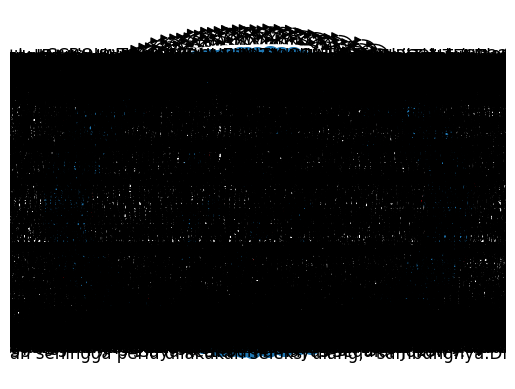

In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

# Baca file CSV dengan similaritas kosinus
G = nx.DiGraph()

with open('cosine_similarities.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    next(reader)  # Skip header
    for row in reader:
        sentence1, sentence2, similarity = row
        similarity = float(similarity)

        if similarity > 0.6:  # Ubah ambang sesuai dengan kebutuhan Anda
            G.add_edge(sentence1, sentence2, weight=similarity)

# Gambar graf
pos = nx.spring_layout(G)  # Anda bisa menggunakan layout yang berbeda
labels = {node: node for node in G.nodes()}
edge_labels = {(node1, node2): f"{G[node1][node2]['weight']:.2f}" for node1, node2 in G.edges()}
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_labels(G, pos, labels)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.axis('off')
plt.show()

In [ ]:
import networkx as nx
import pandas as pd

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Konversi ke DataFrame
df = pd.DataFrame(list(closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Cetak DataFrame
print(df)

                                                  Node  Closeness Centrality
0    Salah satu tokoh terkenal di Jawa Timur dikaba...              0.000000
1    Kepala BPOKK DPD Demokrat Jatim Mugianto menye...              0.000000
2    "Harapan kami dan Insyaallah jadi kenyataan ya...              0.000000
3    Apalagi, Khofifah juga menjabat sebagai Gubern...              0.000000
4    SCROLL TO CONTINUE WITH CONTENT\n"Bu Khofifah ...              0.000000
..                                                 ...                   ...
522  Tadi itu saya kira demikian ya," ujarnya.Prabo...              0.000000
523  Menteri Pertahanan itu mengatakan menu makan s...              0.001901
524         "Ada soto tadi, lontong, cumi-cumi, sayur.              0.001901
525  "Baru saja diundang makan oleh Bapak Presiden ...              0.000000
526            "Saya makan banyak sih," timpal Ganjar.              0.000000

[527 rows x 2 columns]
